In [0]:
!pip install tensorflow pandas scikit-learn


  Using cached tensorflow-2.18.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (615.3 MB)
  Using cached tensorflow_io_gcs_filesystem-0.37.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.1 MB)
  Using cached numpy-2.0.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached wrapt-1.17.0-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (82 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
  Using cached h5py-3.12.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.4 MB)
  Using cached protobuf-5.28.3-cp38-abi3-manylinux2014_x86_64.whl (316 kB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
  Using cached termcolor-2.5.0-py3-none-any.whl (7.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached keras-3.7.0-py3-none-any.whl (1.

In [0]:
%pip install --upgrade numpy==1.22.4 scipy==1.9.3

Python interpreter will be restarted.
  Using cached numpy-1.22.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached scipy-1.9.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.22.4 which is incompatible.
Python interpreter will be restarted.


In [0]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [0]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("Model_building").getOrCreate()

# Load the dataset with updated options
file_path = "/FileStore/merged_data"
data = spark.read.csv(
    file_path,
    header=True,
    inferSchema=True,
    multiLine=True,  # Handles multiline data in cells
    escape='"',      # Handles escaped quotes within data
    quote='"',       # Handles quoted strings properly
    encoding="UTF-8" # Ensures correct text encoding
)

# Show the schema to confirm proper loading
data.printSchema()

# Display the first few rows
data.show(truncate=False, n=20)

root
 |-- Cleaned_JD_Qualifications: string (nullable = true)
 |-- Cleaned_JD_Preference: string (nullable = true)
 |-- Cleaned_JD_Job_Title: string (nullable = true)
 |-- Cleaned_JD_Role: string (nullable = true)
 |-- Cleaned_JD_Job_Description: string (nullable = true)
 |-- Cleaned_JD_skills: string (nullable = true)
 |-- Cleaned_JD_Responsibilities: string (nullable = true)
 |-- Cleaned_Resume_Category: string (nullable = true)
 |-- Cleaned_Resume_information: string (nullable = true)
 |-- Cleaned_JD_Minimum_Experience: integer (nullable = true)
 |-- Cleaned_JD_Qualifications_tokens: string (nullable = true)
 |-- Cleaned_JD_Preference_tokens: string (nullable = true)
 |-- Cleaned_JD_Job_Title_tokens: string (nullable = true)
 |-- Cleaned_JD_Role_tokens: string (nullable = true)
 |-- Cleaned_JD_Job_Description_tokens: string (nullable = true)
 |-- Cleaned_JD_skills_tokens: string (nullable = true)
 |-- Cleaned_JD_Responsibilities_tokens: string (nullable = true)
 |-- Cleaned_Resume_C

In [0]:
df = data.toPandas()

In [0]:
df.head()

,Cleaned_JD_Qualifications,Cleaned_JD_Preference,Cleaned_JD_Job_Title,Cleaned_JD_Role,Cleaned_JD_Job_Description,Cleaned_JD_skills,Cleaned_JD_Responsibilities,Cleaned_Resume_Category,Cleaned_Resume_information,Cleaned_JD_Minimum_Experience,Cleaned_JD_Qualifications_tokens,Cleaned_JD_Preference_tokens,Cleaned_JD_Job_Title_tokens,Cleaned_JD_Role_tokens,Cleaned_JD_Job_Description_tokens,Cleaned_JD_skills_tokens,Cleaned_JD_Responsibilities_tokens,Cleaned_Resume_Category_tokens,Cleaned_Resume_information_tokens,Resume_Score
0,bca,male,electrical designer,electrical engineer,electrical engineers design and develop electr...,electrical engineering circuit design electron...,design electrical systems and components for b...,data science,skills programming languages python pandas num...,4,bca,male,electrical designer,electrical engineer,electrical engineers design and develop electr...,electrical engineering circuit design electron...,design electrical systems and components for b...,data science,skills programming languages python pandas num...,82
1,phd,female,urban planner,city planner,city planners develop and implement urban plan...,urban planning zoning regulations environmenta...,plan and develop land use strategies for urban...,data science,skills programming languages python pandas num...,1,phd,female,urban planner,city planner,city planners develop and implement urban plan...,urban planning zoning regulations environmenta...,plan and develop land use strategies for urban...,data science,skills programming languages python pandas num...,95
2,ba,female,structural engineer,construction engineer,a construction engineer manages construction p...,construction management structural design auto...,oversee construction projects including struct...,data science,skills programming languages python pandas num...,0,ba,female,structural engineer,construction engineer,a construction engineer manages construction p...,construction management structural design auto...,oversee construction projects including struct...,data science,skills programming languages python pandas num...,63
3,bca,female,graphic designer,uiux designer,uiux designers focus on creating userfriendly ...,user interface ui design user experience ux de...,focus on user interface ui and user experience...,data science,skills programming languages python pandas num...,2,bca,female,graphic designer,uiux designer,uiux designers focus on creating userfriendly ...,user interface ui design user experience ux de...,focus on user interface ui and user experience...,data science,skills programming languages python pandas num...,78
4,ba,female,marketing coordinator,marketing specialist,marketing specialists develop and implement ma...,market research and analysis content creation ...,assist in the development and execution of mar...,data science,skills programming languages python pandas num...,5,ba,female,marketing coordinator,marketing specialist,marketing specialists develop and implement ma...,market research and analysis content creation ...,assist in the development and execution of mar...,data science,skills programming languages python pandas num...,93


In [0]:
df.drop(columns = ["Cleaned_JD_Qualifications_tokens",	"Cleaned_JD_Preference_tokens","Cleaned_JD_Job_Title_tokens", "Cleaned_JD_Role_tokens", "Cleaned_JD_Job_Description_tokens", "Cleaned_JD_skills_tokens",	"Cleaned_JD_Responsibilities_tokens", "Cleaned_Resume_Category_tokens", "Cleaned_Resume_information_tokens"])

,Cleaned_JD_Qualifications,Cleaned_JD_Preference,Cleaned_JD_Job_Title,Cleaned_JD_Role,Cleaned_JD_Job_Description,Cleaned_JD_skills,Cleaned_JD_Responsibilities,Cleaned_Resume_Category,Cleaned_Resume_information,Cleaned_JD_Minimum_Experience,Resume_Score
0,bca,male,electrical designer,electrical engineer,electrical engineers design and develop electr...,electrical engineering circuit design electron...,design electrical systems and components for b...,data science,skills programming languages python pandas num...,4,82
1,phd,female,urban planner,city planner,city planners develop and implement urban plan...,urban planning zoning regulations environmenta...,plan and develop land use strategies for urban...,data science,skills programming languages python pandas num...,1,95
2,ba,female,structural engineer,construction engineer,a construction engineer manages construction p...,construction management structural design auto...,oversee construction projects including struct...,data science,skills programming languages python pandas num...,0,63
3,bca,female,graphic designer,uiux designer,uiux designers focus on creating userfriendly ...,user interface ui design user experience ux de...,focus on user interface ui and user experience...,data science,skills programming languages python pandas num...,2,78
4,ba,female,marketing coordinator,marketing specialist,marketing specialists develop and implement ma...,market research and analysis content creation ...,assist in the development and execution of mar...,data science,skills programming languages python pandas num...,5,93
...,...,...,...,...,...,...,...,...,...,...,...
5685,btech,female,network administrator,systems administrator,manage and maintain an organizations it infras...,system administration server maintenance activ...,administer servers and systems ensuring uptime...,testing,skill set os windows xp788110 database mysql s...,2,72
5686,bba,both,customer success manager,account manager,an account manager builds and maintains relati...,account management customer relationship manag...,build and nurture relationships with key clien...,testing,skill set os windows xp788110 database mysql s...,3,98
5687,btech,both,digital marketing specialist,social media manager,social media managers oversee an organizations...,social media platforms eg facebook twitter ins...,manage and grow social media accounts create e...,testing,skill set os windows xp788110 database mysql s...,4,56
5688,mcom,female,supply chain manager,demand planner,a demand planner analyzes historical sales dat...,demand forecasting inventory management data a...,analyze demand patterns and market trends to f...,testing,skill set os windows xp788110 database mysql s...,2,81


In [0]:
df.shape

Out[6]: (5690, 20)

In [0]:
df['combined_text'] = (
    df['Cleaned_JD_Qualifications'].astype(str) + " " +
    df['Cleaned_JD_Preference'].astype(str) + " " +
    df['Cleaned_JD_Job_Title'].astype(str) + " " +
    df['Cleaned_JD_Role'].astype(str) + " " +
    df['Cleaned_JD_Job_Description'].astype(str) + " " +
    df['Cleaned_JD_skills'].astype(str) + " " +
    df['Cleaned_JD_Responsibilities'].astype(str) + " " +
    df['Cleaned_Resume_Category'].astype(str) + " " +
    df['Cleaned_Resume_information'].astype(str)
)

# Check the data
df.head()


,Cleaned_JD_Qualifications,Cleaned_JD_Preference,Cleaned_JD_Job_Title,Cleaned_JD_Role,Cleaned_JD_Job_Description,Cleaned_JD_skills,Cleaned_JD_Responsibilities,Cleaned_Resume_Category,Cleaned_Resume_information,Cleaned_JD_Minimum_Experience,...,Cleaned_JD_Preference_tokens,Cleaned_JD_Job_Title_tokens,Cleaned_JD_Role_tokens,Cleaned_JD_Job_Description_tokens,Cleaned_JD_skills_tokens,Cleaned_JD_Responsibilities_tokens,Cleaned_Resume_Category_tokens,Cleaned_Resume_information_tokens,Resume_Score,combined_text
0,bca,male,electrical designer,electrical engineer,electrical engineers design and develop electr...,electrical engineering circuit design electron...,design electrical systems and components for b...,data science,skills programming languages python pandas num...,4,...,male,electrical designer,electrical engineer,electrical engineers design and develop electr...,electrical engineering circuit design electron...,design electrical systems and components for b...,data science,skills programming languages python pandas num...,82,bca male electrical designer electrical engine...
1,phd,female,urban planner,city planner,city planners develop and implement urban plan...,urban planning zoning regulations environmenta...,plan and develop land use strategies for urban...,data science,skills programming languages python pandas num...,1,...,female,urban planner,city planner,city planners develop and implement urban plan...,urban planning zoning regulations environmenta...,plan and develop land use strategies for urban...,data science,skills programming languages python pandas num...,95,phd female urban planner city planner city pla...
2,ba,female,structural engineer,construction engineer,a construction engineer manages construction p...,construction management structural design auto...,oversee construction projects including struct...,data science,skills programming languages python pandas num...,0,...,female,structural engineer,construction engineer,a construction engineer manages construction p...,construction management structural design auto...,oversee construction projects including struct...,data science,skills programming languages python pandas num...,63,ba female structural engineer construction eng...
3,bca,female,graphic designer,uiux designer,uiux designers focus on creating userfriendly ...,user interface ui design user experience ux de...,focus on user interface ui and user experience...,data science,skills programming languages python pandas num...,2,...,female,graphic designer,uiux designer,uiux designers focus on creating userfriendly ...,user interface ui design user experience ux de...,focus on user interface ui and user experience...,data science,skills programming languages python pandas num...,78,bca female graphic designer uiux designer uiux...
4,ba,female,marketing coordinator,marketing specialist,marketing specialists develop and implement ma...,market research and analysis content creation ...,assist in the development and execution of mar...,data science,skills programming languages python pandas num...,5,...,female,marketing coordinator,marketing specialist,marketing specialists develop and implement ma...,market research and analysis content creation ...,assist in the development and execution of mar...,data science,skills programming languages python pandas num...,93,ba female marketing coordinator marketing spec...


In [0]:
tokenizer = Tokenizer(num_words=5000)  # Limit to top 5000 words
tokenizer.fit_on_texts(df['combined_text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['combined_text'])

# Pad sequences to make them the same length
max_sequence_length = 200  # Adjust as needed
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

In [0]:
# Normalize the Resume_Score
scaler = MinMaxScaler()
df['Resume_Score'] = scaler.fit_transform(df[['Resume_Score']])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, df['Resume_Score'], test_size=0.2, random_state=42
)


In [0]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.metrics import MeanAbsoluteError

# Define a custom function for percentage accuracy
def percentage_accuracy(y_true, y_pred):
    # Calculate Mean Absolute Error
    mae = np.mean(np.abs(y_true - y_pred))

    # Calculate the range of y_true
    range_value = np.max(y_true) - np.min(y_true)

    # Calculate percentage accuracy
    accuracy_percentage = (1 - (mae / range_value)) * 100
    return accuracy_percentage

# Build the model
model_1 = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_sequence_length),  # Embedding layer
    GlobalAveragePooling1D(),  # Pooling layer
    Dense(64, activation='relu'),  # Fully connected layer
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Regression output
])

# Compile the model
model_1.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAbsoluteError()])

# Train the model
history = model_1.fit(
    np.array(X_train), np.array(y_train),
    validation_data=(np.array(X_test), np.array(y_test)),
    epochs=100,  # Adjust epochs based on your dataset
    batch_size=16,  # Adjust batch size as needed
    verbose=1
)


Epoch 1/100


/local_disk0/.ephemeral_nfs/envs/pythonEnv-0a5a2526-74fc-43c7-8652-3569f76cf263/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


285/285 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1143 - mean_absolute_error: 0.2685 - val_loss: 0.0545 - val_mean_absolute_error: 0.1935
Epoch 2/100
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0553 - mean_absolute_error: 0.1952 - val_loss: 0.0588 - val_mean_absolute_error: 0.2059
Epoch 3/100
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0535 - mean_absolute_error: 0.1929 - val_loss: 0.0554 - val_mean_absolute_error: 0.1973
Epoch 4/100
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0536 - mean_absolute_error: 0.1923 - val_loss: 0.0551 - val_mean_absolute_error: 0.1937
Epoch 5/100
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0526 - mean_absolute_error: 0.1906 - val_loss: 0.0575 - val_mean_absolute_error: 0.1945
Epoch 6/100
 71/285 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0503 - mean_absolute_error: 0.1830

*** WARNING: max output size exceeded, skipping output. ***

285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step -

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0646 - mean_absolute_error: 0.2068
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Loss: 0.06536688655614853, Test MAE: 0.20812638103961945
Test Percentage Accuracy: 78.82222737343389%

Sample Predictions:
   True_Resume_Score  Predicted_Resume_Score
0           0.620690                0.594668
1           0.965517                0.661574
2           0.620690                0.619402
3           0.465517                0.532888
4           0.913793                0.641612


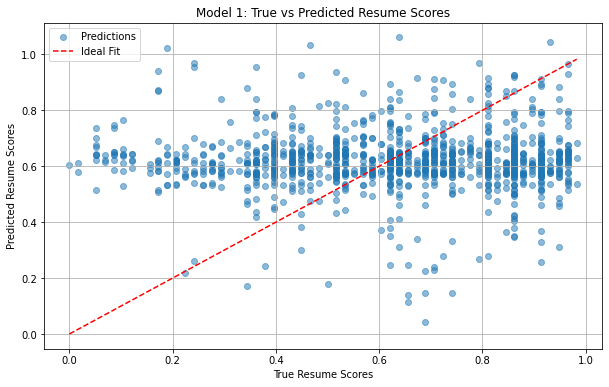

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Evaluate the model on the test set
loss, mae = model_1.evaluate(np.array(X_test), np.array(y_test))

# Predict the values
y_pred = model_1.predict(np.array(X_test))

# Ensure y_test and y_pred are 1-dimensional
y_test = np.array(y_test).ravel()
y_pred = y_pred.ravel()

# Calculate percentage accuracy
accuracy_percentage = percentage_accuracy(y_test, y_pred)
print(f"Test Loss: {loss}, Test MAE: {mae}")
print(f"Test Percentage Accuracy: {accuracy_percentage}%")

# Create DataFrame with True and Predicted values
predictions_df = pd.DataFrame({
    'True_Resume_Score': y_test,
    'Predicted_Resume_Score': y_pred
})

# Display the first few rows of predictions
print("\nSample Predictions:")
print(predictions_df.head())

# Visualize True vs Predicted Resume Scores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.plot(
    [min(y_test), max(y_test)],
    [min(y_test), max(y_test)],
    color='red', linestyle='--', label='Ideal Fit'
)
plt.xlabel("True Resume Scores")
plt.ylabel("Predicted Resume Scores")
plt.title("Model 1: True vs Predicted Resume Scores")
plt.legend()
plt.grid()
plt.show()


In [0]:
# Save Model 1
model_1.save("model_1.h5")

In [0]:
df.columns

Out[15]: Index(['Cleaned_JD_Qualifications', 'Cleaned_JD_Preference',
       'Cleaned_JD_Job_Title', 'Cleaned_JD_Role', 'Cleaned_JD_Job_Description',
       'Cleaned_JD_skills', 'Cleaned_JD_Responsibilities',
       'Cleaned_Resume_Category', 'Cleaned_Resume_information',
       'Cleaned_JD_Minimum_Experience', 'Cleaned_JD_Qualifications_tokens',
       'Cleaned_JD_Preference_tokens', 'Cleaned_JD_Job_Title_tokens',
       'Cleaned_JD_Role_tokens', 'Cleaned_JD_Job_Description_tokens',
       'Cleaned_JD_skills_tokens', 'Cleaned_JD_Responsibilities_tokens',
       'Cleaned_Resume_Category_tokens', 'Cleaned_Resume_information_tokens',
       'Resume_Score', 'combined_text'],
      dtype='object')

In [0]:
# Step 3: Create and Encode Suitability Levels
def assign_suitability_level(row):
    if row['Resume_Score'] > 80 and row['Years_Experience'] > 5:
        return 'High'
    elif row['Resume_Score'] > 50:
        return 'Medium'
    else:
        return 'Low'

In [0]:
df.columns

Out[17]: Index(['Cleaned_JD_Qualifications', 'Cleaned_JD_Preference',
       'Cleaned_JD_Job_Title', 'Cleaned_JD_Role', 'Cleaned_JD_Job_Description',
       'Cleaned_JD_skills', 'Cleaned_JD_Responsibilities',
       'Cleaned_Resume_Category', 'Cleaned_Resume_information',
       'Cleaned_JD_Minimum_Experience', 'Cleaned_JD_Qualifications_tokens',
       'Cleaned_JD_Preference_tokens', 'Cleaned_JD_Job_Title_tokens',
       'Cleaned_JD_Role_tokens', 'Cleaned_JD_Job_Description_tokens',
       'Cleaned_JD_skills_tokens', 'Cleaned_JD_Responsibilities_tokens',
       'Cleaned_Resume_Category_tokens', 'Cleaned_Resume_information_tokens',
       'Resume_Score', 'combined_text'],
      dtype='object')

In [0]:
print(df.columns)  # List all column names


Index(['Cleaned_JD_Qualifications', 'Cleaned_JD_Preference',
       'Cleaned_JD_Job_Title', 'Cleaned_JD_Role', 'Cleaned_JD_Job_Description',
       'Cleaned_JD_skills', 'Cleaned_JD_Responsibilities',
       'Cleaned_Resume_Category', 'Cleaned_Resume_information',
       'Cleaned_JD_Minimum_Experience', 'Cleaned_JD_Qualifications_tokens',
       'Cleaned_JD_Preference_tokens', 'Cleaned_JD_Job_Title_tokens',
       'Cleaned_JD_Role_tokens', 'Cleaned_JD_Job_Description_tokens',
       'Cleaned_JD_skills_tokens', 'Cleaned_JD_Responsibilities_tokens',
       'Cleaned_Resume_Category_tokens', 'Cleaned_Resume_information_tokens',
       'Resume_Score', 'combined_text'],
      dtype='object')


In [0]:
print(f"Length of y_pred: {len(y_pred)}")
print(f"Number of rows in df: {len(df)}")


Length of y_pred: 1138
Number of rows in df: 5690


In [0]:
# If df contains extra rows, slice df to match y_pred:
if len(y_pred) < len(df):
    df = df.iloc[:len(y_pred)]


In [0]:
# Check lengths
print(f"Length of y_pred: {len(y_pred)}")
print(f"Number of rows in df: {len(df)}")

# Align lengths if necessary
if len(y_pred) != len(df):
    raise ValueError(f"Length mismatch: y_pred ({len(y_pred)}) and df ({len(df)})")

# Add 'Predicted_Resume_Score' to the DataFrame
df['Predicted_Resume_Score'] = y_pred


Length of y_pred: 1138
Number of rows in df: 1138


<command-2515142958495909>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Resume_Score'] = y_pred


In [0]:
print(f"Length of padded_sequences: {len(padded_sequences)}")
print(f"Length of df['Predicted_Resume_Score']: {len(df['Predicted_Resume_Score'])}")


Length of padded_sequences: 5690
Length of df['Predicted_Resume_Score']: 1138


In [0]:
padded_sequences = padded_sequences[:len(df)]


In [0]:
# Debug lengths
print(f"Length of padded_sequences: {len(padded_sequences)}")
print(f"Length of df['Predicted_Resume_Score']: {len(df['Predicted_Resume_Score'])}")

# Align lengths
if len(padded_sequences) > len(df):
    padded_sequences = padded_sequences[:len(df)]
elif len(df) > len(padded_sequences):
    df = df.iloc[:len(padded_sequences)]

# Combine features
X_combined_with_predictions = np.hstack([
    np.array(padded_sequences),
    df['Predicted_Resume_Score'].values.reshape(-1, 1)
])

# Combine target
y_combined = df['Suitability_Level_Encoded']


Length of padded_sequences: 1138
Length of df['Predicted_Resume_Score']: 1138


In [0]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Define suitability levels
def assign_suitability(row):
    if row['Predicted_Resume_Score'] > 0.8 and row['Cleaned_JD_Minimum_Experience'] > 5:
        return "High"
    elif row['Predicted_Resume_Score'] > 0.5:
        return "Medium"
    else:         
        return "Low"

# Step 2: Assign suitability levels and encode them
df['Suitability_Level'] = df.apply(assign_suitability, axis=1)

label_encoder = LabelEncoder()
df['Suitability_Level_Encoded'] = label_encoder.fit_transform(df['Suitability_Level'])

print("Classes:", label_encoder.classes_)  # Debug: Print encoded classes

# Step 3: Combine features for Model 2
X_combined_with_predictions = np.hstack([np.array(padded_sequences), df['Predicted_Resume_Score'].values.reshape(-1, 1)])
y_combined = df['Suitability_Level_Encoded']

# Step 4: Split data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_combined_with_predictions, y_combined, test_size=0.2, random_state=42
)

# Step 5: Build the second model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model

input_layer_2 = Input(shape=(X_train_2.shape[1],))
dense_2 = Dense(256, activation='relu')(input_layer_2)
dense_2 = Dropout(0.4)(dense_2)
dense_2 = BatchNormalization()(dense_2)
dense_2 = Dense(128, activation='relu')(dense_2)
dense_2 = Dropout(0.3)(dense_2)
dense_2 = Dense(64, activation='relu')(dense_2)

# Correct output layer
output_layer_2 = Dense(len(label_encoder.classes_), activation='softmax')(dense_2)

model_2 = Model(inputs=input_layer_2, outputs=output_layer_2)
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history_2 = model_2.fit(
    X_train_2, y_train_2,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# Step 7: Evaluate the model
loss_2, accuracy_2 = model_2.evaluate(X_test_2, y_test_2)
print(f"Model 2 - Loss: {loss_2}, Accuracy: {accuracy_2}")

# Step 8: Predict suitability levels
predictions_2 = model_2.predict(X_test_2)
predicted_classes_2 = predictions_2.argmax(axis=1)

# Decode predicted suitability levels
predicted_suitability = label_encoder.inverse_transform(predicted_classes_2)

# Display sample predictions
predictions_df_2 = pd.DataFrame({
    'Predicted_Resume_Score': X_test_2[:, -1],
    'Actual_Suitability_Level': label_encoder.inverse_transform(y_test_2),
    'Predicted_Suitability_Level': predicted_suitability
})
print("\nSample Predictions (Model 2):")
print(predictions_df_2.head())


Classes: ['Low' 'Medium']
Epoch 1/50


<command-2515142958495896>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Suitability_Level'] = df.apply(assign_suitability, axis=1)
<command-2515142958495896>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Suitability_Level_Encoded'] = label_encoder.fit_transform(df['Suitability_Level'])


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8820 - loss: 0.3399 - val_accuracy: 0.9505 - val_loss: 0.4139
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9408 - loss: 0.2081 - val_accuracy: 0.9505 - val_loss: 0.2750
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9237 - loss: 0.2317 - val_accuracy: 0.9505 - val_loss: 0.2576
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9347 - loss: 0.2052 - val_accuracy: 0.9505 - val_loss: 0.2388
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9319 - loss: 0.2058 - val_accuracy: 0.9505 - val_loss: 0.2427
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9426 - loss: 0.1877 - val_accuracy: 0.9505 - val_loss: 0.2354
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9367 - loss: 0.1890 - val_accuracy: 0.9505 - val_loss: 0.2290
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9383 - loss: 0.2006 - val_accuracy: 0.9505 - val_loss: 0.2359
Ep

In [0]:
# Save Model 2
model_2.save("model_2.h5")